# KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

In [2]:
# Datos
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
data

array([[ 8. , 10. ],
       [ 3. , 10.5],
       [ 7. , 13.5],
       [ 5. , 18. ],
       [ 5. , 13. ],
       [ 6. ,  9. ],
       [ 9. , 11. ],
       [ 3. , 18. ],
       [ 8.5, 12. ],
       [ 8. , 16. ]])

In [3]:
C = np.array([[8, 10], [3, 10.5]]) # Centroides iniciales

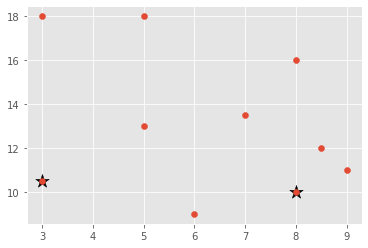

In [4]:
# Gráfica de los datos
fig = plt.figure()
plt.scatter(C[0][0], C[0][1], marker = '*', s = 200, c = 'black')
plt.scatter(C[1][0], C[1][1], marker = '*', s = 200, c = 'black')
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [5]:
def dist(a, b, ax = 1):
  '''
  Función para calcular la distancia 
  entre los vectores a y b
  '''
  return np.linalg.norm(a-b, axis = ax)

In [6]:
distances = []
clusters = np.zeros(len(data))

for i in range(len(data)):
  distance = dist(data[i], C) # Lista con las distancias del vector de data a los dos clusters iniciales
  distances.append(distance)
  cluster = np.argmin(distance) # El indice con la distancia más pequeña entre el vector y cada uno de los clusters iniciales
  clusters[i] = cluster # Guardamos en clusters el indice cluster

print(clusters) 
distances

[0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]


[array([0.        , 5.02493781]),
 array([5.02493781, 0.        ]),
 array([3.64005494, 5.        ]),
 array([8.54400375, 7.76208735]),
 array([4.24264069, 3.20156212]),
 array([2.23606798, 3.35410197]),
 array([1.41421356, 6.02079729]),
 array([9.43398113, 7.5       ]),
 array([2.06155281, 5.70087713]),
 array([6.        , 7.43303437])]

In [7]:
# Actualizar centroides
for i in range(len(C)):
  points = [data[j] for j in range(len(data)) if  clusters[j] == i] # Junta todos los puntos de data que están en el cluster 0 y los que están en el cluster 1
  C[i] = np.mean(points, axis = 0) # Calcula el promedio de los puntos de cada cluster
  print('Cluster {}: {}'.format(i, points) )

print('\n', C)

Cluster 0: [array([ 8., 10.]), array([ 7. , 13.5]), array([6., 9.]), array([ 9., 11.]), array([ 8.5, 12. ]), array([ 8., 16.])]
Cluster 1: [array([ 3. , 10.5]), array([ 5., 18.]), array([ 5., 13.]), array([ 3., 18.])]

 [[ 7.75       11.91666667]
 [ 4.         14.875     ]]


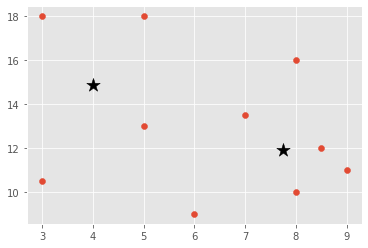

In [8]:
# Gráfica de los datos
fig = plt.figure()
plt.scatter(C[0][0], C[0][1], marker = '*', s = 200, c = 'black')
plt.scatter(C[1][0], C[1][1], marker = '*', s = 200, c = 'black')
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Terminar el algoritmo (aplicar iteraciones)

In [9]:
# scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

In [10]:
data = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/xclara.csv')
data.head(3)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176


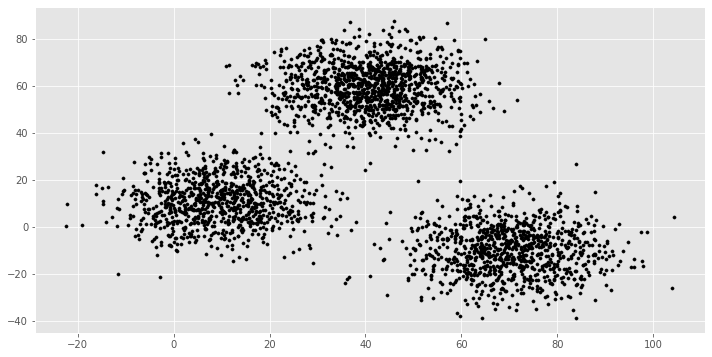

In [11]:
x1 = data['V1'].values
x2 = data.V2.values
X = np.array(list(zip(x1, x2)))
plt.scatter(x1, x2, c = 'black', s = 10)
plt.show()

In [12]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x1, x2)))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_hat = kmeans.predict(X)
C_ = kmeans.cluster_centers_
C_

array([[  9.4780459 ,  10.686052  ],
       [ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119]])

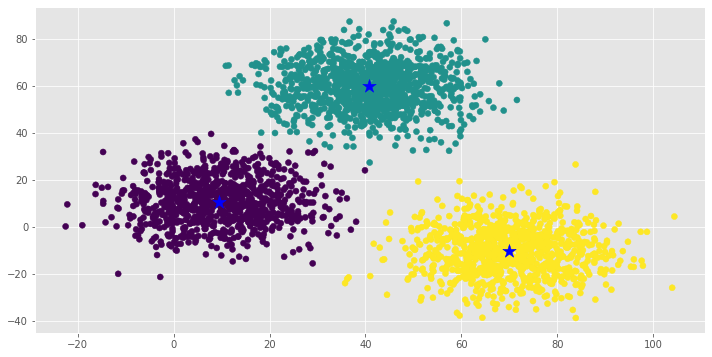

In [13]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = y_hat)
ax.scatter(C_[:, 0], C_[:, 1], marker = '*', s = 200, c = 'blue')
plt.show()

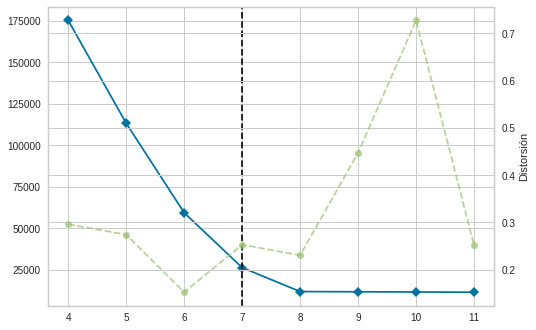

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

X, y = make_blobs(n_samples = 1000, n_features = 12 , centers = 8, random_state = 42)
visualizer = KElbowVisualizer(KMeans(), k = (4, 12), timings = True)
visualizer.fit(X)
plt.xlabel('Número de gruops')
plt.ylabel('Distorsión')
plt.show()

# Aglomerativo

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
url = 'https://bit.ly/2COHM14'
data = pd.read_csv(url)
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [17]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619


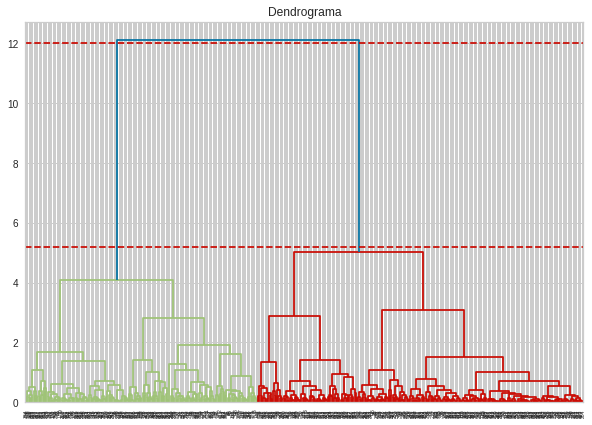

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 7))
plt.title('Dendrograma')
dend = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.axhline(y = 5.2, color = 'r', linestyle = '--')
plt.axhline(y = 12, color = 'r', linestyle = '--')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, 
                                  affinity = 'euclidean',
                                  linkage = 'ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

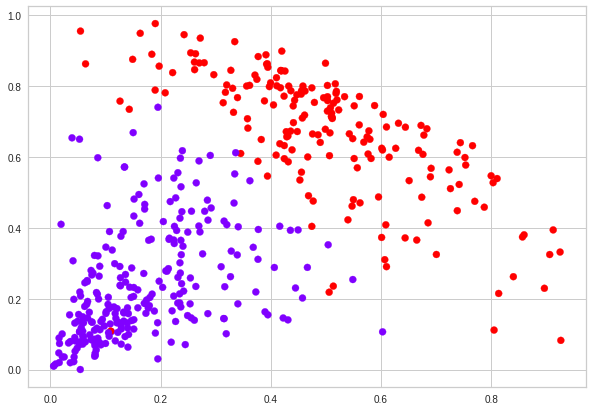

In [20]:
plt.figure(figsize = (10, 7))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = cluster.labels_, cmap = 'rainbow')
plt.show()

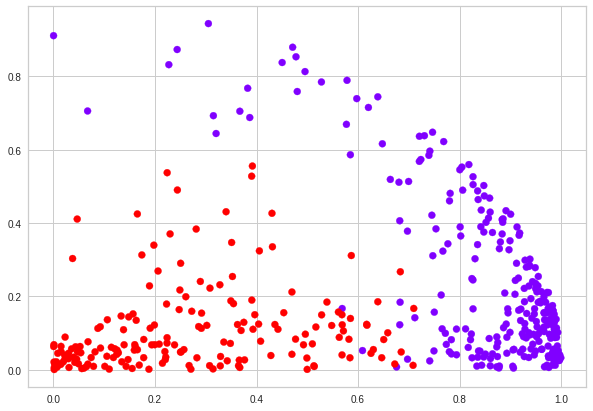

In [21]:
plt.figure(figsize = (10, 7))
plt.scatter(data_scaled.Fresh, data_scaled.Frozen, c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv')
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [24]:
X = dataset.iloc[:, [3, 4]].values

In [25]:
import scipy.cluster.hierarchy as sch

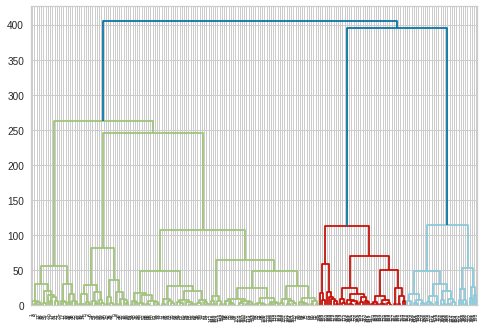

In [26]:
dendrogram = sch.dendrogram( sch.linkage(X, method = 'ward'))
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hat = hc.fit_predict(X)

No handles with labels found to put in legend.


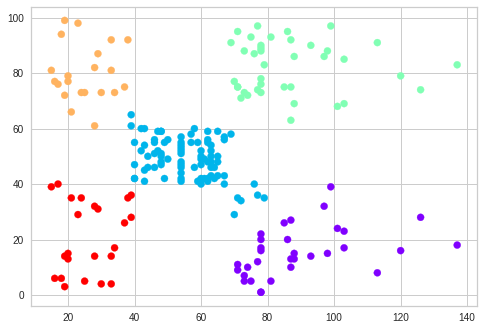

In [28]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 50, cmap = 'rainbow')
plt.legend()
plt.show()

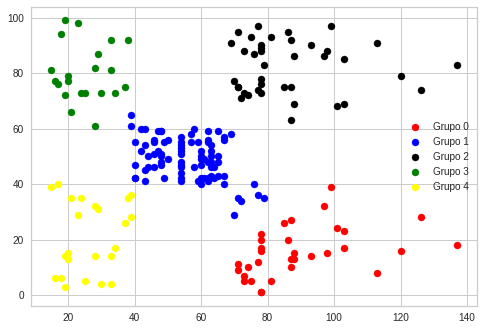

In [29]:
plt.scatter(X[y_hat == 0, 0], X[y_hat == 0, 1], s = 50, c = 'red', label = 'Grupo 0' )
plt.scatter(X[y_hat == 1, 0], X[y_hat == 1, 1], s = 50, c = 'blue', label = 'Grupo 1' )
plt.scatter(X[y_hat == 2, 0], X[y_hat == 2, 1], s = 50, c = 'black', label = 'Grupo 2' )
plt.scatter(X[y_hat == 3, 0], X[y_hat == 3, 1], s = 50, c = 'green', label = 'Grupo 3' )
plt.scatter(X[y_hat == 4, 0], X[y_hat == 4, 1], s = 50, c = 'yellow', label = 'Grupo 4' )
plt.legend()
plt.show()

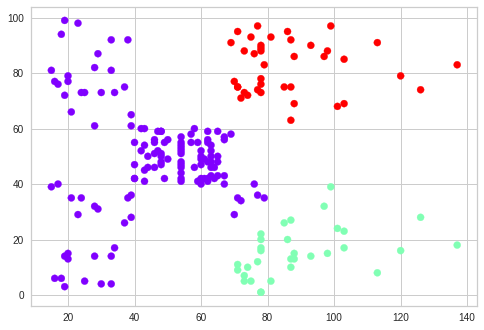

In [30]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hat = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 50, cmap = 'rainbow')
plt.show()

# Modelos de Mezclas Gaussianas (GMM)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

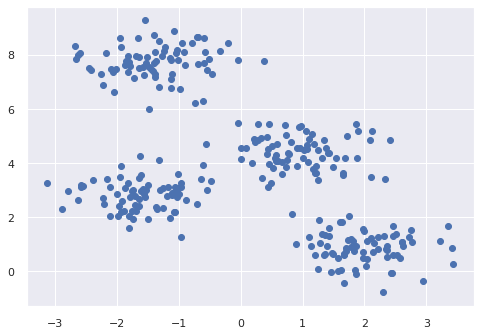

In [32]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

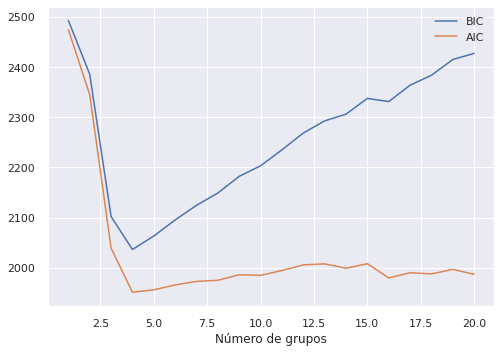

In [33]:
n_clusters = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X)
        for n in n_clusters]
plt.plot(n_clusters, [m.bic(X) for m in models], label = 'BIC') # bic es el criterio Bayesiano
plt.plot(n_clusters, [m.aic(X) for m in models], label = 'AIC') # bic es el criterio Akaike
plt.legend()
plt.xlabel('Número de grupos')
plt.show()

In [34]:
# Ambos criterios nos dicen que el número óptimo de componentes es 4
gmm = GaussianMixture(n_components = 4)
gmm.fit(X)

GaussianMixture(n_components=4)

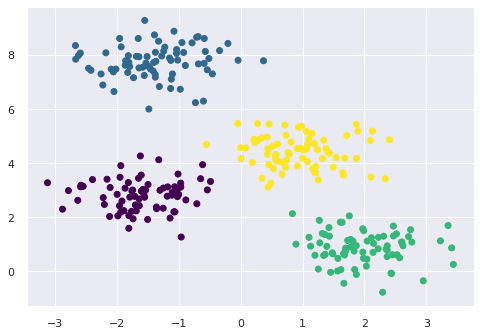

In [35]:
y_hat = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_hat, cmap = 'viridis')
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [38]:
X_train = np.load('/content/data.npy')
X_train.shape

(200, 2)

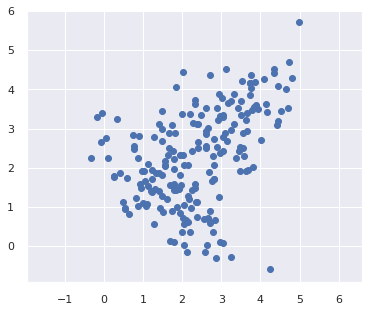

In [39]:
plt.figure(figsize = (6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1],  c ='b', marker = 'o')
plt.axis('equal')
plt.show()

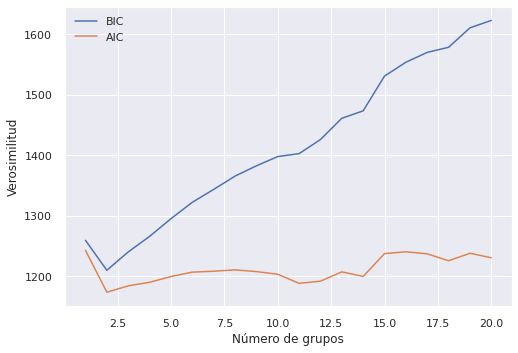

In [40]:
n_clusters = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X_train)
        for n in n_clusters]
plt.plot(n_clusters, [m.bic(X_train) for m in models], label = 'BIC') # bic es el criterio Bayesiano
plt.plot(n_clusters, [m.aic(X_train) for m in models], label = 'AIC') # bic es el criterio Akaike
plt.legend()
plt.xlabel('Número de grupos')
plt.ylabel('Verosimilitud')
plt.show()

El número óptimo de componentes es 2

In [41]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(X_train)

print('Medias: \n', gmm.means_)
print('\n')
print('Covarianzas: \n', gmm.covariances_)

Medias: 
 [[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


Covarianzas: 
 [[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


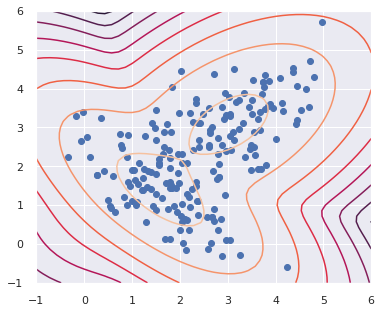

In [42]:
from IPython.core.pylabtools import figsize
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50, 50))

plt.figure(figsize = (6, 5))
plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [43]:
gmm.predict(np.array([[5, 5]]))

array([0])

In [44]:
gmm.predict(np.array([[4, -1]]))

array([1])

In [45]:
gmm.predict(X_train)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Conclusiones
En lo particular me pareció bastante interesante entender el funcionamiento de los algoritmos. EL algoritmo KMeans es un algoritmo que ya concía pero con el código desarrollado, ahora me queda más claro como funciona y me pareció interesante la manera tan simple en que se programa el método del codo. Además fue interesante conocer el algoritmo de Mezclas Gaussianas, es un algoritmo que llamó mi atención debido a la matemática que tiene detrás de él. En lo personal el aprendizaje no supervisado es una parte del Machine Learning que siempre ha sido de mi interés, me parece muy ingenioso como mediante estos algoritmos, podemos hacer que una máquina aprenda de los datos sin etiquetas y tan solo mediante cosas como medir distancias entre cada uno de los registros, sé que hay mucha más matemática detrás, sin embargo creo que la idea es tan sencilla como elegante y resultó interesante programar uno de los algoritmo desde cero, para poder entender justamente el transfondo de esta idea.